# **Required Packages**



In [1]:
#Restart your session to apply the installed packages
! pip install evaluate
! pip install transformers[torch]
! pip install SentencePiece
! pip install re
! pip install nltk
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-

In [2]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.2
    Uninstalling transformers-4.40.2:
      Successfully uninstalled transformers-4.40.2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
stopword = set(STOPWORDS)

import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from transformers import RobertaTokenizer
from transformers import TFAutoModel
from tensorflow import keras
from transformers import TFRobertaModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Reading the data from kaggle**

In [2]:
#This will require a Token from kaggle to download the dataset
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          20676        459  1.0              
jainaru/world-happiness-report-2024-yearly-updated               World Happiness Report- 2024                       62KB  2024-05-15 19:04:34           1356         28  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56           5303        112  1.0              
jainaru/thyroid-disease-data                                     

In [3]:
! unzip '/content/twitter-entity-sentiment-analysis.zip'

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [4]:
data = pd.read_csv('/content/twitter_training.csv')
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
val_data = pd.read_csv('/content/twitter_validation.csv')
val_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# **Observation and data cleaning**

In [6]:
val_data.rename(columns={'Irrelevant': 'sentiment'}, inplace=True)
data.rename(columns={'Positive': 'sentiment'}, inplace=True)

In [7]:
print("Possible values of the dataset", data['sentiment'].unique())
data = data[data['sentiment'] != 'Irrelevant']
print("Possible values of the dataset after removing irrelavant", data['sentiment'].unique())
print("Number of Positive tweets",(data['sentiment'] == 'Positive').sum())
print("Number of Negative tweets",(data['sentiment'] == 'Negative').sum())
print("Number of Neutral tweets",(data['sentiment'] == 'Neutral').sum())


Possible values of the dataset ['Positive' 'Neutral' 'Negative' 'Irrelevant']
Possible values of the dataset after removing irrelavant ['Positive' 'Neutral' 'Negative']
Number of Positive tweets 20831
Number of Negative tweets 22542
Number of Neutral tweets 18318


In [8]:
print("Possible values of the dataset", val_data['sentiment'].unique())
val_data = val_data[val_data['sentiment'] != 'Irrelevant']
print("Possible values of the dataset after removing irrelavant", val_data['sentiment'].unique())
print("Number of Positive tweets",(val_data['sentiment'] == 'Positive').sum())
print("Number of Negative tweets",(val_data['sentiment'] == 'Negative').sum())
print("Number of Neutral tweets",(val_data['sentiment'] == 'Neutral').sum())

Possible values of the dataset ['Neutral' 'Negative' 'Positive' 'Irrelevant']
Possible values of the dataset after removing irrelavant ['Neutral' 'Negative' 'Positive']
Number of Positive tweets 277
Number of Negative tweets 266
Number of Neutral tweets 285


In [9]:
val_data.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'sentence'}, inplace=True)
val_data

<ipython-input-9-18813229b301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'sentence'}, inplace=True)


,3364,Facebook,sentiment,sentence
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
992,314,Amazon,Negative,Please explain how this is possible! How can t...
993,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
data.rename(columns={'im getting on borderlands and i will murder you all ,': 'sentence'}, inplace=True)
data

<ipython-input-10-ba209a1764dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'im getting on borderlands and i will murder you all ,': 'sentence'}, inplace=True)


,2401,Borderlands,sentiment,sentence
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
val_data.drop('Facebook',axis=1,inplace=True)
data.drop('Borderlands',axis=1,inplace=True)


<ipython-input-11-aed6c165c4e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.drop('Facebook',axis=1,inplace=True)
<ipython-input-11-aed6c165c4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Borderlands',axis=1,inplace=True)


In [12]:
val_data.drop('3364',axis=1,inplace=True)
data.drop('2401',axis=1,inplace=True)

<ipython-input-12-89bbfd771428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.drop('3364',axis=1,inplace=True)
<ipython-input-12-89bbfd771428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('2401',axis=1,inplace=True)


In [13]:
data

,sentiment,sentence
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [14]:
val_data

,sentiment,sentence
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
992,Negative,Please explain how this is possible! How can t...
993,Positive,Good on Sony. As much as I want to see the new...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
data.dropna(axis=0, inplace=True)

<ipython-input-15-1edeb318a43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [16]:
data_positive = data[data['sentiment'] == 'Positive']
data_negative = data[data['sentiment'] == 'Negative']
data_neutral = data[data['sentiment'] == 'Neutral']

data_positive = data_positive.sample(n=18108, random_state=42)
data_negative = data_negative.sample(n=18108, random_state=42)
data_neutral = data_neutral.sample(n=18108, random_state=42)

data = pd.concat([data_positive, data_negative, data_neutral])
data = data.sample(frac=1, random_state=42)

data


,sentiment,sentence
37072,Positive,Excellent work James!
45063,Negative,5 My
28651,Neutral,Yo boy tops S5 Watson's top 5 killers
9902,Neutral,Xbox Series X graphics cheat code stolen and l...
9356,Negative,haha<unk>
...,...,...
7355,Positive,Woah
70066,Neutral,just
28468,Neutral,..<unk>.playstation.com/
45439,Positive,"Today I'm back at Verizon, I now have OANN and..."


In [17]:
data

,sentiment,sentence
37072,Positive,Excellent work James!
45063,Negative,5 My
28651,Neutral,Yo boy tops S5 Watson's top 5 killers
9902,Neutral,Xbox Series X graphics cheat code stolen and l...
9356,Negative,haha<unk>
...,...,...
7355,Positive,Woah
70066,Neutral,just
28468,Neutral,..<unk>.playstation.com/
45439,Positive,"Today I'm back at Verizon, I now have OANN and..."


In [18]:
print("Number of Positive tweets",(data['sentiment'] == 'Positive').sum())
print("Number of Negative tweets",(data['sentiment'] == 'Negative').sum())
print("Number of Neutral tweets",(data['sentiment'] == 'Neutral').sum())

Number of Positive tweets 18108
Number of Negative tweets 18108
Number of Neutral tweets 18108


In [19]:
pos_data = data[data['sentiment'] == 'Positive']
neg_data = data[data['sentiment'] == 'Negative']
neu_data = data[data['sentiment'] == 'Neutral']

In [20]:
pos_data.columns

Index(['sentiment', 'sentence'], dtype='object')

In [21]:
def data_preprocceing(text):
  text = re.sub(r'\b\w*\d\w*\b', '', text)
  text = re.sub(r'\b(?:https?://)?(?:www\.)?[\w.-]+\.[a-zA-Z]{2,}\b', '', text)
  text = re.sub(r'<.*?>', '', text)
  text = text.lower()
  text = re.sub(r'https\S+|www\S+https\S+','',text, flags=re.MULTILINE)
  text = re.sub(r"@[^\s]+",'',text)
  text = re.sub(r"#[^\s]+",'',text)
  text = re.sub(r'[^\w\s]','',text)

  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stopwords.words('english')]
  return ' '.join(filtered_text)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54324 entries, 37072 to 1338
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  54324 non-null  object
 1   sentence   54324 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [23]:

data.sentence = data.sentence.astype(str).apply(data_preprocceing)


In [24]:
data = data.reset_index(drop=True)

In [25]:
data

,sentiment,sentence
0,Positive,excellent work james
1,Negative,
2,Neutral,yo boy tops watsons top killers
3,Neutral,xbox series x graphics cheat code stolen leake...
4,Negative,haha
...,...,...
54319,Positive,woah
54320,Neutral,
54321,Neutral,
54322,Positive,today im back verizon oann newsmax havent watc...


# **Preparing our data for training**

In [26]:
x = data.sentence
y = data.sentiment

In [27]:
y = y.replace({'Positive': 0, 'Neutral': 1, 'Negative': 2})
depth = 3
y = tf.one_hot(y, depth)

In [28]:
max_len = 128

In [29]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [30]:
roberta = TFAutoModel.from_pretrained("roberta-base")

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [31]:
encode_data=tokenizer.encode_plus(x[1],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [32]:
encode_data

{'input_ids': [0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [33]:
test_input_id=np.asarray(encode_data['input_ids'])
test_attention_mask=np.asarray(encode_data['attention_mask'])
output_data=roberta([test_input_id.reshape(1,-1),test_attention_mask.reshape(1,-1)])
type(output_data)

transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions

In [34]:
output_data

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.05337329,  0.088544  , -0.00546656, ..., -0.04813442,
         -0.05593479, -0.01916073],
        [-0.05439713,  0.09354165, -0.03095309, ..., -0.09103074,
         -0.06373735, -0.05334744],
        [-0.05467579, -0.13694143,  0.0768747 , ..., -0.00513887,
         -0.12597422,  0.06514362],
        ...,
        [-0.05467579, -0.13694143,  0.0768747 , ..., -0.00513887,
         -0.12597422,  0.06514362],
        [-0.05467579, -0.13694143,  0.0768747 , ..., -0.00513887,
         -0.12597422,  0.06514362],
        [-0.05467579, -0.13694143,  0.0768747 , ..., -0.00513887,
         -0.12597422,  0.06514362]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.03403822,  0.30877617,  0.06130575, -0.30364436,  0.41452277,
         0.21051745,  0.23574935,  0.26828352, -0.23028505, -0.22548504,
         0.2109433 , -0.355

In [35]:
tokenizer.decode(encode_data["input_ids"])

'<s></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [36]:
final_text_data=x
final_label_data=np.array(y)

In [37]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]

    for i in range(len(final_text_data)):
        encode_data=tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True, truncation=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)

In [38]:
text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)

In [39]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,final_label_data.shape))

Text Input Ids Shape (54324, 128) 
Text Input Attention Mask Shape (54324, 128) 
Label Data shape (54324, 3)


In [40]:
x_train_input,x_test_input,y_train_label,y_test_label,train_mask,test_mask=train_test_split(text_input_ids,final_label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [41]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(x_train_input.shape,x_test_input.shape,y_train_label.shape,y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (43459, 128)
Test input shape (10865, 128)
Train label shape (43459, 3)
Test label shape (10865, 3)
Train attention mask shape (43459, 128)
Test attention mask shape (10865, 128)


# **Model Creation and Transfer Learning**

In [42]:
def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")

    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]

    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)
    final_layer = tf.keras.layers.Dense(3, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)

    return model

In [43]:
model = Create_Roberta_Model()
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_roberta_model_1 (TFRobe  TFBaseModelOutputWithPooli   1246456   ['input_1[0][0]',             
 rtaModel)                   ngAndCrossAttentions(last_   32         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [44]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()

model.compile(loss=loss,optimizer=optimizer, metrics=accuracy)

# **Model Training**

In [46]:
history=model.fit([x_train_input,train_mask],y_train_label,batch_size=42,epochs=3,validation_data=([x_test_input,test_mask],y_test_label))

Epoch 1/3
1035/1035 [==============================] - 1205s 1s/step - loss: 0.3804 - categorical_accuracy: 0.8504 - val_loss: 0.4236 - val_categorical_accuracy: 0.8469
Epoch 2/3
1035/1035 [==============================] - 1151s 1s/step - loss: 0.2894 - categorical_accuracy: 0.8881 - val_loss: 0.3869 - val_categorical_accuracy: 0.8679
Epoch 3/3
1035/1035 [==============================] - 1205s 1s/step - loss: 0.2287 - categorical_accuracy: 0.9095 - val_loss: 0.3930 - val_categorical_accuracy: 0.8793


# **Testing and Evaluation**

In [50]:
text = "Have been LOL big time at this Apprentice video http://ping.fm/vXPnd (via @tdrury) - Thanks, me and @rebel_aceman laughed at it too!"
text = data_preprocceing(text)
text_input_ids,text_attention_masks = roberta_encode(text,max_len)
preds = model.predict([text_input_ids,text_attention_masks])
overall = np.mean(preds, axis = 0)
predicted = np.argmax(overall)
print("overall sentiment: ", overall)
print("predicted sentiment: ", predicted)

2/2 [==============================] - 3s 187ms/step
overall sentiment:  [0.24408062 0.5444513  0.21146812]
predicted sentiment:  1


In [74]:
val_data.sentence = val_data.sentence.astype(str).apply(data_preprocceing)

In [75]:
val_data = val_data.reset_index(drop=True)

In [76]:
text_input_ids,text_attention_masks = roberta_encode(val_data.sentence,max_len)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [77]:
ct = val_data.shape[0]
token_type_ids_t = np.zeros((ct,128),dtype='int32')

In [78]:
token_type_ids_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [79]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

In [80]:
preds = model.predict([text_input_ids,text_attention_masks])

26/26 [==============================] - 7s 271ms/step


In [81]:
preds

array([[6.1537648e-05, 9.9977905e-01, 1.5944336e-04],
       [3.6598172e-05, 5.4998345e-05, 9.9990845e-01],
       [5.5919507e-05, 4.9789989e-05, 9.9989426e-01],
       ...,
       [9.9946350e-01, 5.1038788e-04, 2.6136440e-05],
       [9.9989152e-01, 1.7365186e-05, 9.1086309e-05],
       [1.6132861e-05, 9.9994123e-01, 4.2659227e-05]], dtype=float32)

In [131]:
y_pred = val_data.sentiment.replace({'Positive': 0, 'Neutral': 1, 'Negative': 2})
depth = 3
y_pred = tf.one_hot(y_pred, depth)

In [113]:
model.evaluate([text_input_ids,text_attention_masks],y_pred)

26/26 [==============================] - 7s 279ms/step - loss: 0.0910 - categorical_accuracy: 0.9746


[0.09096862375736237, 0.9746376872062683]

In [155]:
sns.set_style("darkgrid")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [145]:
ohe = preprocessing.OneHotEncoder()
y_pred = val_data.sentiment.replace({'Positive': 0, 'Neutral': 1, 'Negative': 2})
y_pred = ohe.fit_transform(np.array(y_pred).reshape(-1, 1)).toarray()

In [146]:
y_pred

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

Text(0.5, 36.72222222222221, 'Predicted')

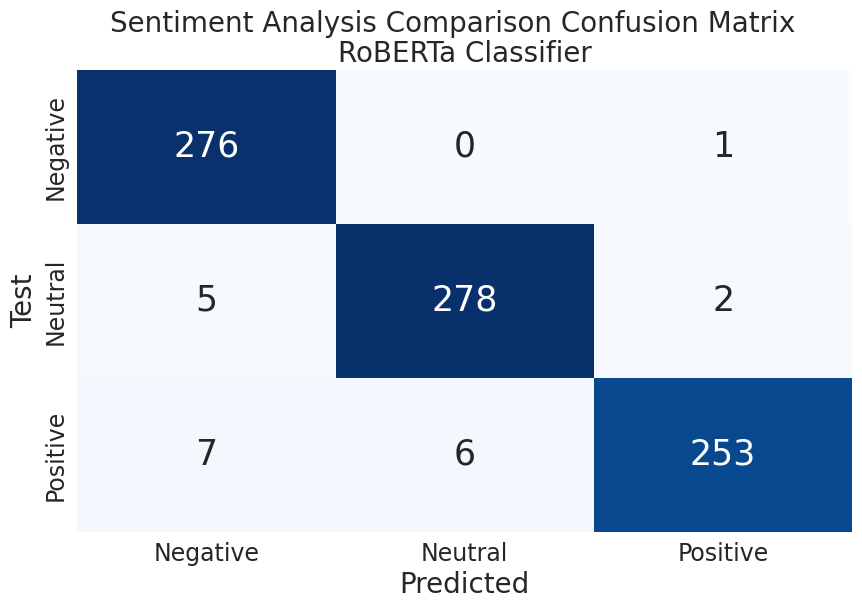

In [156]:
fig, ax = plt.subplots(1,figsize=(10,6))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison Confusion Matrix', fontsize=20)


sns.heatmap(confusion_matrix(y_pred.argmax(1),preds.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})

ax.set_title('RoBERTa Classifier', fontsize=20)
ax.set_yticklabels(labels, fontsize=17);
ax.set_xticklabels(labels, fontsize=17);
ax.set_ylabel('Test', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)